# Julia 數值系統
Julia 數值系統型別 (Type) 階層，其最上層的父型別是`Any`，也是 Julia 所有型別的父型別。數值系統的最上層父型別為`Number`。

In Julia, the top supertype of all types is `Any`. ([Special types: Core.Any](https://docs.julialang.org/en/v1/base/base/#Core.Any))

And the top supertype in numeric primitives is `Number`.

In [50]:
# supuertype and subtypes of Number
println(supertype(Number))
println(subtypes(Number))

# isa(x, type) -> bool
# Determine whether x is of the given type.
# Integer is Any
println("1 is `Any` => ", isa(1, Any))
println("1 is `Number` => ", isa(1, Number))

Any
Any[Complex, Real]
1 is `Any` => true
1 is `Number` => true


In [43]:
# show type tree
function subtypetree(t, level=1, indent=4)
   level == 1 && println(t)
   for s in subtypes(t)
     println(join(fill(" ", level * indent)) * string(s))
     subtypetree(s, level+1, indent)
   end
end
subtypetree(Number)

Number
    Complex
    Real
        AbstractFloat
            BigFloat
            Float16
            Float32
            Float64
        AbstractIrrational
            Irrational
        Integer
            Bool
            Signed
                BigInt
                Int128
                Int16
                Int32
                Int64
                Int8
            Unsigned
                UInt128
                UInt16
                UInt32
                UInt64
                UInt8
        Rational


In [47]:
function show_supertypes(io::IO, typ::DataType) 
     print(io, typ) 
     while typ != Any 
         typ = supertype(typ) 
         print(io, " <: ", typ) 
     end 
 end 
show_supertypes(Number)
show_supertypes(Int32)

Number <: Any
Int32 <: Signed <: Integer <: Real <: Number <: Any


## 1. 整數 (Integer)
整數是數值系統中最基本的型別，分為"有正負號(signed)"、"無正負號(unsigned)"以及"布林值"整數型別，其最大和最小值也不同。

\*注意：BigInt為任意精度(Arbitrary Precision)，沒有辦法查看最大值與最小值。([Arbitrary Precision Arithmetic](https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers/#Arbitrary-Precision-Arithmetic-1))

```plain
Number
  |
  └──Real
       |
       └──Integer
            |
            ├──Bool
            |
            ├──Signed
            |    |
            |    ├──BigInt
            |    ├──Int128
            |    ├──Int64
            |    ├──Int32
            |    ├──Int16
            |    └──Int8
            └──Unsigned
                 |
                 ├──UInt128
                 ├──UInt64
                 ├──UInt32
                 ├──UInt16
                 └──UInt8
```


|是否有正負號|型別|<div style="width:120px">位元數<div>|<div style="width:120px">最大值</div>|<div style="width:120px">最小值</div>|
|---|---|---|---|---|
|有|Int128, Int64, Int32, Int16, Int8|根據型別內數字|$2^{位元數-1}-1$|$-2^{位元數-1}$|
|無|UInt128, UInt64, UInt32, UInt16, UInt8|根據型別內數字|$2^{位元數}-1$|$0$|
|N/A|Bool|8|true(1)|false(0)|


### 1.1 範圍

下面範例是呼叫 `typemax()` 與 `typemin()` 函式查看 Int64 型別的最大值和最小值。

In [55]:
println("$(rpad(Int64, 7)): 最小值 $(typemin(Int64)), 最大值 $(typemax(Int64))")

Int64  : 最小值 -9223372036854775808, 最大值 9223372036854775807


以下範例為直接計算Int64型別的最大值和最小值。

In [54]:
println("$(rpad(Int64, 7)): 最小值 $(-2^(63-1)), 最大值 $(2^(64-1)-1)")

Int64  : 最小值 -4611686018427387904, 最大值 9223372036854775807


查看Bool型別的最大值和最小值

In [57]:
println("$(rpad(Bool, 7)): 最小值 $(typemin(Bool)), 最大值 $(typemax(Bool))")

Bool   : 最小值 false, 最大值 true


`BigInt` 型別是任意精度 (Arbitrary Precision)，若要呼叫 `typemax()` 或 `typemin()` 則會產生錯誤。

In [72]:
typemax(BigInt)

MethodError: MethodError: no method matching typemax(::Type{BigInt})
Closest candidates are:
  typemax(!Matched::Type{Bool}) at bool.jl:7
  typemax(!Matched::Type{Int8}) at int.jl:652
  typemax(!Matched::Type{UInt8}) at int.jl:654
  ...

In [73]:
typemin(BigInt)

MethodError: MethodError: no method matching typemin(::Type{BigInt})
Closest candidates are:
  typemin(!Matched::Type{Bool}) at bool.jl:6
  typemin(!Matched::Type{Int8}) at int.jl:651
  typemin(!Matched::Type{UInt8}) at int.jl:653
  ...

In [76]:
BigInt(typemax(Int64)) * 5

46116860184273879035

### 1.2 使用與宣告變數

Julia 會自動判斷適用的整數值型別，十進位的值會自動指定為有正負號的整數，預設的位數是以作業系統位元數為準，例如 64 位元的作業系統就會自動採用 `Int64` 型別。(註: 在不影響位元數的情況下，也就是未超過型別的最大值，且未指定型別。)

若超過 `Int64` 最大值時，Julia 會自動判斷並將型別定為 `Int128`。(一開始創建時即超過最大值)

In [77]:
# 查看內部變數 Sys.WORD_SIZE，顯示作業系統為 32-bit 或 64-bit。
Sys.WORD_SIZE

64

In [93]:
# 32-bit system:
# julia> typeof(1)
# Int32

# 64-bit system:
x = 3
println(typeof(x))  # 自動採用Int64型別
println(Int == Int64)  # Int等於Int64

Int64
true


In [96]:
println(typeof(2^63 + 1))  # 2^63, 1都是Int64
println(typeof(Int128(2^63) + 1))  # 2^63是Int128，因此相加時1從Int64轉型為Int128
println(typeof(2^63 + Int128(1)))  # 1是Int128，因此相加時2^63從Int64轉型為Int128
println(typeof(9223372036854775808))  # 創建時即為Int128

Int64
Int128
Int128
Int128


使用 `length()` 加上 `bitstring()` 函式可以看到不同整數型別的位元數。

In [79]:
length(bitstring(x))

64

使用`sizeof()`查看型別的位元組數(bytes)

In [80]:
# Size, in bytes, of the canonical binary representation of the given DataType
println("Int64 的位元組數(bytes)是: ", sizeof(x))

Int64 的位元組數(bytes)是: 8


In [81]:
println("Bool 的位元組數(bytes)是: ", sizeof(Bool))

Bool 的位元組數(bytes)是: 1


若是十六進位(hexadecimal)、八進位(octal)、二進位(Binary)的整數值，則可以將 `0x`, `0o`, `0b` 放在數值之前，代表不同的進位制。下面的例子是不同進位制的宣告。

須留意十六進位、八進位、二進位之英文字母均需小寫。

In [98]:
# 十進位
20

20

In [1]:
# 十六進位 僅可使用0-9a-f
0x12

0x12

In [2]:
# 八進位 僅可使用0-7
0o24

0x14

In [5]:
# 二進位 僅可使用0-1
0b10

0x02

In [11]:
# 利用前方補0來控制位元數
tmp1 = 0x00000000000000000000000012
tmp2 = 0x12
println("十進位整數: $(tmp1); 位元數: $(sizeof(tmp1))")
println("十進位整數: $(tmp2); 位元數: $(sizeof(tmp2))")

十進位整數: 18; 位元數: 16
十進位整數: 18; 位元數: 1


上面有提到，十進位的整數會自動判斷為有 signed 整數，但是十六/八/二進位則會自動判斷為 unsigned。

In [18]:
println(typeof(0x14))
println(typeof(0x1f423af))
println(typeof(0o22163))
println(typeof(0b10111001110))

UInt8
UInt32
UInt16
UInt16


Binary, octal, and hexadecimal literals may be signed by a - immediately preceding the unsigned literal. They produce an unsigned integer of the same size as the unsigned literal would do, with the two's complement of the value.

在二進制、八進制及十六進制的文字前加上"-"，可以產生跟無號整數相同位元長度的二補數([Two's complement](https://en.wikipedia.org/wiki/Two%27s_complement))。

In [12]:
-0x2

0xfe

In [13]:
-0x0002

0xfffe

### 1.3 指定型別與轉換

型別的指定，只要在宣告時加上型別名稱即可。以下例來說，如果沒有指定的話，型別根據系統(Sys.WORD_SIZE)決定是 `Int32` 或 `Int64`。

In [16]:
y = Int128(3)
typeof(y)

Int128

In [17]:
length(bitstring(y))

128

#### `signed()` 或 `unsigned()`

有無正負號的轉換，可以透過 `signed()` 或 `unsigned()` 來進行。下面的例子就可以看到我們把 `Int64` 轉換為 `UInt64` 型別。

In [14]:
typeof(unsigned(20))

UInt64

將 Int8 轉為 UInt8。

In [15]:
typeof(unsigned(Int8(20)))

UInt8

將 UInt32 轉為 Int32。

In [16]:
typeof(signed(UInt32(20)))

Int32

要留意的是，`signed()` 轉換時，若造成轉換後溢位 (overflow)，系統並不會顯示錯誤。

In [17]:
x = typemax(UInt8) # UInt8 最大值為 255 (2^8-1)
signed(x) # 由於 Int8 的最大值為 127 (2^7-1)，所以轉換後會造成 overflow

-1

若要自動偵測是否可以安全轉換，建議使用`convert()`(詳細介紹請參考[Conversion and Promotion](https://docs.julialang.org/en/v1/manual/conversion-and-promotion/#conversion-and-promotion-1))。

In [33]:
# 使用convert
x = typemax(UInt8)
convert(Int8, x)

InexactError: InexactError: check_top_bit(Int8, 255)

In [34]:
# 使用constructor(少數情況會與convert有不同行為)
x = typemax(UInt8)
Int8(x)

InexactError: InexactError: check_top_bit(Int8, 255)

#### `BigInt`

`BigInt` 可以用在當型別要超出精度時 (例如最大值加 1 或是最小值 - 1)，避免因此而造成溢位 (overflow)。

In [18]:
# 溢位，結果為負數
typemax(Int64) + 1

-9223372036854775808

`BigInt` 必須明確 (explicitly) 宣告，無法自動被 promote。轉換為 `BigInt` 後就不會造成溢位了。

In [19]:
BigInt(typemax(Int64)) + 1

9223372036854775808

### 1.4 Division Error

相除取整數 (integer divide; 運算子為 $\div$) 時，若是將整數 $\div$ 零，會產生 `DivideError`。

有關於運算及運算子，會在未來的內容中進行詳細介紹。

In [37]:
3 ÷ 2

1

Division Error的情況
1. 除以零 (dividing by zero)
2. 最小負整數除以-1 (dividing the lowest negative number (typemin) by -1)

In [43]:
# 1. dividing by zero
3 ÷ 0  # 同div(3, 0), div(x, y): The quotient from Euclidean division. Computes x/y, truncated to an integer.

DivideError: DivideError: integer division error

In [47]:
# 2. dividing the lowest negative number (typemin) by -1.
div(typemin(Int64), -1)

DivideError: DivideError: integer division error

The remainder and modulus functions (rem and mod) throw a DivideError when their second argument is zero.

餘數和模數函數（rem和mod）在第二個參數為零時會出現DivideError。

In [49]:
rem(7, 3)

1

In [50]:
mod(7, 3)

1

In [51]:
7 % 3

1

In [53]:
rem(7, 0)

DivideError: DivideError: integer division error

但是除法 (divide) 的分母可以為 0，其結果為無窮大(Inf)。

In [39]:
3 / 0

Inf

## 2. 布林值 (Bool)

布林值是用 `true` 或 `false` 保留字來代表邏輯判斷的"真"或"假"。

在型別系統上，`Bool` 是 `Integer` 的子型別。如果用 `bitstring()` 來查看的話，會發現 `true` / `false` 內部是以 `Int8` 型別表達。

In [56]:
bitstring(true), bitstring(false)

("00000001", "00000000")

### 轉換

`Bool` 可以與整數型別進行互相轉換。

In [59]:
# Bool 轉為整數，只要是整數型別都可以
# 使用convert()
convert(Int, true), convert(Int8, false)

(1, 0)

In [60]:
# Bool 轉為整數，只要是整數型別都可以
# 使用constructor
Int(true), Int8(false)

(1, 0)

In [61]:
# 整數轉為 Bool
# 使用convert()
convert(Bool, Int64(1)), convert(Bool, 0)

(true, false)

In [62]:
# 整數轉為 Bool
# 使用constructor
Bool(Int64(1)), Bool(0)

(true, false)

若嘗試將非 1 / 0 的整數值轉為 `Bool`，則會產生 `InexactError` 錯誤。

In [64]:
# 使用convert()
convert(Bool, 10)

InexactError: InexactError: Bool(10)

In [63]:
# 使用constructor
Bool(10)

InexactError: InexactError: Bool(10)

跟有些程式語言不同的是，在 Julia 中不能用 1 / 0 整數值來取代 `true` / `false`，會造成 `TypeError` 錯誤。

In [66]:
if true
    println("true")
end

if 1
    println("true")
end

true


TypeError: TypeError: non-boolean (Int64) used in boolean context

## 3. 浮點數 (Floating Point)

浮點數沒有 signed / unsigned 的區分，而是分為不同的精度。
```
Number
  |
  └──Real
       |
       └──AbstractFloat
            |
            ├──BigFloat
            ├──Float16
            ├──Float32
            └──Float64
```

|型別|精度|位元數|
|---|---|---|
|`Float16`|半精度(Half Precision)|16|
|`Float32`|單精度(Single Precision)|32|
|`Float64`|雙精度(Double Precision)|64|

### 3.1 範圍

浮點數是實數的子型別，其邊界值為無窮大或負無窮大。

|型別|最小值|最大值|
|---|---|---|
|`Float64`|-Inf|Inf|
|`Float32`|-Inf 或 -Inf32|Inf 或 Inf32|
|`Float16`|-Inf 或 -Inf16|Inf 或 Inf16|

無窮值 (`Inf` 及 `-Inf`) 在 Julia 都是正常的浮點數。下面範例是呼叫 `typemax()` 與 `typemin()` 函式可以查看 Float64 型別的最大值和最小值。

In [67]:
println("$(rpad(Float64,7)): 最小值 $(typemin(Float64)), 最大值 $(typemax(Float64))")

Float64: 最小值 -Inf, 最大值 Inf


In [2]:
typemax(Float16)

Inf16

In [3]:
typemin(Float16)

-Inf16

`BigFloat`的最大值與最小值，也可以用`typemax()`和`typemin()`查看。

In [4]:
typemax(BigFloat)

Inf

In [5]:
typemin(BigFloat)

-Inf

### 3.2 宣告

下列的方式均可宣告數值為浮點數。

In [6]:
1.0, 1., 0.5, .5, -1.2

(1.0, 1.0, 0.5, 0.5, -1.2)

也可以使用科學記號進行宣告。

In [7]:
1.e10, 1.0e-3

(1.0e10, 0.001)

同樣的，預設的位數是以作業系統位元數為準，例如 64 位元的作業系統就會自動採用 `Float64` 型別。

In [8]:
typeof(1.)

Float64

若加上 f0 字串，則是宣告為 Float32。

In [18]:
1f0  # Float32後面接有f0

1.0f0

In [19]:
# ans 是 Julia 將最後一個值指定給 ans 變數
typeof(ans)

Float32

Literal Float32 values can be entered by writing an f in place of e (類似科學記號的寫法)

In [16]:
2.5f-4

0.00025f0

In [17]:
typeof(2.5f-4)

Float32

除了上述 `Inf` 是浮點數外，`NaN` (not a number) 也是屬於特殊浮點數，有 `NaN`, `NaN64`, `NaN32`, `NaN16` 。

In [20]:
typeof(NaN)

Float64

In [21]:
typeof(NaN16)

Float16

浮點數零比較特別，正零與負零均為零，請看下面範例。但是實際上正零與負零的位元內容不相同。

In [22]:
0.0 == -0.0

true

In [23]:
bitstring(0.0)

"0000000000000000000000000000000000000000000000000000000000000000"

In [24]:
bitstring(-0.0)

"1000000000000000000000000000000000000000000000000000000000000000"

如果要避免混淆，可以透過 zero() 函式來宣告零浮點數。

zero() 函式的用途很廣泛，未來會在相關應用時提供範例。

In [25]:
zero(Float64)

0.0

In [26]:
bitstring(ans)

"0000000000000000000000000000000000000000000000000000000000000000"

### 3.3 指定型別

型別的指定，只要在宣告時加上型別名稱即可。

In [ ]:
Float32(1.0)

In [ ]:
typeof(ans)

Hexadecimal floating-point literals are also valid, but only as `Float64` values, with p preceding the base-2 exponent:

十六進制的浮點數是合法的，但是僅支援`Float64`。p後面接以2為底的指數。

In [68]:
0x1p0

1.0

In [69]:
0x1.8p3

12.0

In [70]:
0x.4p-1

0.125

In [71]:
typeof(ans)

Float64

Half-precision floating-point numbers are also supported (`Float16`), but they are implemented in software and use `Float32` for calculations.

Float16是在軟體上實現，並使用Float32進行計算。

In [72]:
sizeof(Float16(4.))

2

In [73]:
2*Float16(4.)

Float16(8.0)

The underscore `_` can be used as digit separator:

可以使用底線`_`分隔數字(方便閱讀)

In [74]:
10_000, 0.000_000_005, 0xdead_beef, 0b1011_0010

(10000, 5.0e-9, 0xdeadbeef, 0xb2)

### 3.4 $\epsilon$ (epsilon)

Julia 提供了 `eps()` 函式來計算 epsilon。

若不熟悉epsilon，請參考[Machine epsilon](https://en.wikipedia.org/wiki/Machine_epsilon)。

In [27]:
eps()

2.220446049250313e-16

In [28]:
# 預設即為 eps(Float64)
eps(Float64)

2.220446049250313e-16

也可以計算某特定數值的 epsilon。

In [31]:
eps(100.0)

1.4210854715202004e-14

100.0 的下一個可表現的浮點值如下例。

In [32]:
100.0 + eps(100.0)

100.00000000000001

我們也可以用 nextfloat() 或 prevfloat() 來取得下一個或上一個可表現的浮點數值。

In [33]:
nextfloat(100.0)

100.00000000000001

### 3.5  Rounding

在 Rounding 的方法部分，Julia 是採用 IEEE 754 規範，也就是 `RoundNearest`，取最近的偶數(四捨五取最近偶數)，而非我們一般講的四捨五入。

要採用不同的 rounding 方法，可在呼叫 `round()` 函式時加入不同的常數參數，列表如下:

|常數|描述|
|---|---|
|RoundNearest (default)|四捨五取最近偶數(預設)|
|RoundNearestTiesAway|四捨五取遠離0|
|RoundNearestTiesUp|四捨五入|
|RoundToZero|無條件捨去|
|RoundFromZero (BigFloat only)|四捨五取遠離0|
|RoundUp|無條件進位|
|RoundDown|無條件退位|

In [61]:
# RoundNearest 四捨五取最近偶數
println("round(-0.9) => ", round(-0.9))  # 進
println("round(-0.8) => ", round(-0.8))  # 進
println("round(-0.7) => ", round(-0.7))  # 進
println("round(-0.6) => ", round(-0.6))  # 進
println("round(-0.5) => ", round(-0.5))  # 取最近偶數0
println("round(-0.4) => ", round(-0.4))  # 捨
println("round(-0.3) => ", round(-0.3))  # 捨
println("round(-0.2) => ", round(-0.2))  # 捨
println("round(-0.1) => ", round(-0.1))  # 捨
println("round( 0.1) => ", round( 0.1))  # 捨
println("round( 0.2) => ", round( 0.2))  # 捨
println("round( 0.3) => ", round( 0.3))  # 捨
println("round( 0.4) => ", round( 0.4))  # 捨
println("round( 0.5) => ", round( 0.5))  # 取最近偶數
println("round( 0.6) => ", round( 0.6))  # 進
println("round( 0.7) => ", round( 0.7))  # 進
println("round( 0.8) => ", round( 0.8))  # 進
println("round( 0.9) => ", round( 0.9))  # 進

round(-0.9) => -1.0
round(-0.8) => -1.0
round(-0.7) => -1.0
round(-0.6) => -1.0
round(-0.5) => -0.0
round(-0.4) => -0.0
round(-0.3) => -0.0
round(-0.2) => -0.0
round(-0.1) => -0.0
round( 0.1) => 0.0
round( 0.2) => 0.0
round( 0.3) => 0.0
round( 0.4) => 0.0
round( 0.5) => 0.0
round( 0.6) => 1.0
round( 0.7) => 1.0
round( 0.8) => 1.0
round( 0.9) => 1.0


In [63]:
# RoundNearestTiesAway 四捨五取遠離0
println("round(-0.9, RoundNearestTiesAway) => ", round(-0.9, RoundNearestTiesAway))  # 進
println("round(-0.8, RoundNearestTiesAway) => ", round(-0.8, RoundNearestTiesAway))  # 進
println("round(-0.7, RoundNearestTiesAway) => ", round(-0.7, RoundNearestTiesAway))  # 進
println("round(-0.6, RoundNearestTiesAway) => ", round(-0.6, RoundNearestTiesAway))  # 進
println("round(-0.5, RoundNearestTiesAway) => ", round(-0.5, RoundNearestTiesAway))  # 取遠離0
println("round(-0.4, RoundNearestTiesAway) => ", round(-0.4, RoundNearestTiesAway))  # 捨
println("round(-0.3, RoundNearestTiesAway) => ", round(-0.3, RoundNearestTiesAway))  # 捨
println("round(-0.2, RoundNearestTiesAway) => ", round(-0.2, RoundNearestTiesAway))  # 捨
println("round(-0.1, RoundNearestTiesAway) => ", round(-0.1, RoundNearestTiesAway))  # 捨
println("round( 0.1, RoundNearestTiesAway) => ", round( 0.1, RoundNearestTiesAway))  # 捨
println("round( 0.2, RoundNearestTiesAway) => ", round( 0.2, RoundNearestTiesAway))  # 捨
println("round( 0.3, RoundNearestTiesAway) => ", round( 0.3, RoundNearestTiesAway))  # 捨
println("round( 0.4, RoundNearestTiesAway) => ", round( 0.4, RoundNearestTiesAway))  # 捨
println("round( 0.5, RoundNearestTiesAway) => ", round( 0.5, RoundNearestTiesAway))  # 取遠離0
println("round( 0.6, RoundNearestTiesAway) => ", round( 0.6, RoundNearestTiesAway))  # 進
println("round( 0.7, RoundNearestTiesAway) => ", round( 0.7, RoundNearestTiesAway))  # 進
println("round( 0.8, RoundNearestTiesAway) => ", round( 0.8, RoundNearestTiesAway))  # 進
println("round( 0.9, RoundNearestTiesAway) => ", round( 0.9, RoundNearestTiesAway))  # 進

round(-0.9, RoundNearestTiesAway) => -1.0
round(-0.8, RoundNearestTiesAway) => -1.0
round(-0.7, RoundNearestTiesAway) => -1.0
round(-0.6, RoundNearestTiesAway) => -1.0
round(-0.5, RoundNearestTiesAway) => -1.0
round(-0.4, RoundNearestTiesAway) => -0.0
round(-0.3, RoundNearestTiesAway) => -0.0
round(-0.2, RoundNearestTiesAway) => -0.0
round(-0.1, RoundNearestTiesAway) => -0.0
round( 0.1, RoundNearestTiesAway) => 0.0
round( 0.2, RoundNearestTiesAway) => 0.0
round( 0.3, RoundNearestTiesAway) => 0.0
round( 0.4, RoundNearestTiesAway) => 0.0
round( 0.5, RoundNearestTiesAway) => 1.0
round( 0.6, RoundNearestTiesAway) => 1.0
round( 0.7, RoundNearestTiesAway) => 1.0
round( 0.8, RoundNearestTiesAway) => 1.0
round( 0.9, RoundNearestTiesAway) => 1.0


In [62]:
# RoundNearestTiesUp 四捨五入
println("round(-0.9, RoundNearestTiesUp) => ", round(-0.9, RoundNearestTiesUp))  # 進
println("round(-0.8, RoundNearestTiesUp) => ", round(-0.8, RoundNearestTiesUp))  # 進
println("round(-0.7, RoundNearestTiesUp) => ", round(-0.7, RoundNearestTiesUp))  # 進
println("round(-0.6, RoundNearestTiesUp) => ", round(-0.6, RoundNearestTiesUp))  # 進
println("round(-0.5, RoundNearestTiesUp) => ", round(-0.5, RoundNearestTiesUp))  # 取遠離0
println("round(-0.4, RoundNearestTiesUp) => ", round(-0.4, RoundNearestTiesUp))  # 捨
println("round(-0.3, RoundNearestTiesUp) => ", round(-0.3, RoundNearestTiesUp))  # 捨
println("round(-0.2, RoundNearestTiesUp) => ", round(-0.2, RoundNearestTiesUp))  # 捨
println("round(-0.1, RoundNearestTiesUp) => ", round(-0.1, RoundNearestTiesUp))  # 捨
println("round( 0.1, RoundNearestTiesUp) => ", round( 0.1, RoundNearestTiesUp))  # 捨
println("round( 0.2, RoundNearestTiesUp) => ", round( 0.2, RoundNearestTiesUp))  # 捨
println("round( 0.3, RoundNearestTiesUp) => ", round( 0.3, RoundNearestTiesUp))  # 捨
println("round( 0.4, RoundNearestTiesUp) => ", round( 0.4, RoundNearestTiesUp))  # 捨
println("round( 0.5, RoundNearestTiesUp) => ", round( 0.5, RoundNearestTiesUp))  # 取遠離0
println("round( 0.6, RoundNearestTiesUp) => ", round( 0.6, RoundNearestTiesUp))  # 進
println("round( 0.7, RoundNearestTiesUp) => ", round( 0.7, RoundNearestTiesUp))  # 進
println("round( 0.8, RoundNearestTiesUp) => ", round( 0.8, RoundNearestTiesUp))  # 進
println("round( 0.9, RoundNearestTiesUp) => ", round( 0.9, RoundNearestTiesUp))  # 進

round(-0.9, RoundNearestTiesUp) => -1.0
round(-0.8, RoundNearestTiesUp) => -1.0
round(-0.7, RoundNearestTiesUp) => -1.0
round(-0.6, RoundNearestTiesUp) => -1.0
round(-0.5, RoundNearestTiesUp) => -0.0
round(-0.4, RoundNearestTiesUp) => -0.0
round(-0.3, RoundNearestTiesUp) => -0.0
round(-0.2, RoundNearestTiesUp) => -0.0
round(-0.1, RoundNearestTiesUp) => -0.0
round( 0.1, RoundNearestTiesUp) => 0.0
round( 0.2, RoundNearestTiesUp) => 0.0
round( 0.3, RoundNearestTiesUp) => 0.0
round( 0.4, RoundNearestTiesUp) => 0.0
round( 0.5, RoundNearestTiesUp) => 1.0
round( 0.6, RoundNearestTiesUp) => 1.0
round( 0.7, RoundNearestTiesUp) => 1.0
round( 0.8, RoundNearestTiesUp) => 1.0
round( 0.9, RoundNearestTiesUp) => 1.0


In [64]:
# RoundToZero 無條件捨去
println("round(-0.9, RoundToZero) => ", round(-0.9, RoundToZero))  # 捨
println("round(-0.8, RoundToZero) => ", round(-0.8, RoundToZero))  # 捨
println("round(-0.7, RoundToZero) => ", round(-0.7, RoundToZero))  # 捨
println("round(-0.6, RoundToZero) => ", round(-0.6, RoundToZero))  # 捨
println("round(-0.5, RoundToZero) => ", round(-0.5, RoundToZero))  # 捨
println("round(-0.4, RoundToZero) => ", round(-0.4, RoundToZero))  # 捨
println("round(-0.3, RoundToZero) => ", round(-0.3, RoundToZero))  # 捨
println("round(-0.2, RoundToZero) => ", round(-0.2, RoundToZero))  # 捨
println("round(-0.1, RoundToZero) => ", round(-0.1, RoundToZero))  # 捨
println("round( 0.1, RoundToZero) => ", round( 0.1, RoundToZero))  # 捨
println("round( 0.2, RoundToZero) => ", round( 0.2, RoundToZero))  # 捨
println("round( 0.3, RoundToZero) => ", round( 0.3, RoundToZero))  # 捨
println("round( 0.4, RoundToZero) => ", round( 0.4, RoundToZero))  # 捨
println("round( 0.5, RoundToZero) => ", round( 0.5, RoundToZero))  # 捨
println("round( 0.6, RoundToZero) => ", round( 0.6, RoundToZero))  # 捨
println("round( 0.7, RoundToZero) => ", round( 0.7, RoundToZero))  # 捨
println("round( 0.8, RoundToZero) => ", round( 0.8, RoundToZero))  # 捨
println("round( 0.9, RoundToZero) => ", round( 0.9, RoundToZero))  # 捨

round(-0.9, RoundToZero) => -0.0
round(-0.8, RoundToZero) => -0.0
round(-0.7, RoundToZero) => -0.0
round(-0.6, RoundToZero) => -0.0
round(-0.5, RoundToZero) => -0.0
round(-0.4, RoundToZero) => -0.0
round(-0.3, RoundToZero) => -0.0
round(-0.2, RoundToZero) => -0.0
round(-0.1, RoundToZero) => -0.0
round( 0.1, RoundToZero) => 0.0
round( 0.2, RoundToZero) => 0.0
round( 0.3, RoundToZero) => 0.0
round( 0.4, RoundToZero) => 0.0
round( 0.5, RoundToZero) => 0.0
round( 0.6, RoundToZero) => 0.0
round( 0.7, RoundToZero) => 0.0
round( 0.8, RoundToZero) => 0.0
round( 0.9, RoundToZero) => 0.0


In [66]:
# RoundUp 無條件進位
println("round(-0.9, RoundUp) => ", round(-0.9, RoundUp))  # 進
println("round(-0.8, RoundUp) => ", round(-0.8, RoundUp))  # 進
println("round(-0.7, RoundUp) => ", round(-0.7, RoundUp))  # 進
println("round(-0.6, RoundUp) => ", round(-0.6, RoundUp))  # 進
println("round(-0.5, RoundUp) => ", round(-0.5, RoundUp))  # 進
println("round(-0.4, RoundUp) => ", round(-0.4, RoundUp))  # 進
println("round(-0.3, RoundUp) => ", round(-0.3, RoundUp))  # 進
println("round(-0.2, RoundUp) => ", round(-0.2, RoundUp))  # 進
println("round(-0.1, RoundUp) => ", round(-0.1, RoundUp))  # 進
println("round( 0.1, RoundUp) => ", round( 0.1, RoundUp))  # 進
println("round( 0.2, RoundUp) => ", round( 0.2, RoundUp))  # 進
println("round( 0.3, RoundUp) => ", round( 0.3, RoundUp))  # 進
println("round( 0.4, RoundUp) => ", round( 0.4, RoundUp))  # 進
println("round( 0.5, RoundUp) => ", round( 0.5, RoundUp))  # 進
println("round( 0.6, RoundUp) => ", round( 0.6, RoundUp))  # 進
println("round( 0.7, RoundUp) => ", round( 0.7, RoundUp))  # 進
println("round( 0.8, RoundUp) => ", round( 0.8, RoundUp))  # 進
println("round( 0.9, RoundUp) => ", round( 0.9, RoundUp))  # 進

round(-0.9, RoundUp) => -0.0
round(-0.8, RoundUp) => -0.0
round(-0.7, RoundUp) => -0.0
round(-0.6, RoundUp) => -0.0
round(-0.5, RoundUp) => -0.0
round(-0.4, RoundUp) => -0.0
round(-0.3, RoundUp) => -0.0
round(-0.2, RoundUp) => -0.0
round(-0.1, RoundUp) => -0.0
round( 0.1, RoundUp) => 1.0
round( 0.2, RoundUp) => 1.0
round( 0.3, RoundUp) => 1.0
round( 0.4, RoundUp) => 1.0
round( 0.5, RoundUp) => 1.0
round( 0.6, RoundUp) => 1.0
round( 0.7, RoundUp) => 1.0
round( 0.8, RoundUp) => 1.0
round( 0.9, RoundUp) => 1.0


In [67]:
# RoundDown 無條件退位
println("round(-0.9, RoundDown) => ", round(-0.9, RoundDown))  # 退
println("round(-0.8, RoundDown) => ", round(-0.8, RoundDown))  # 退
println("round(-0.7, RoundDown) => ", round(-0.7, RoundDown))  # 退
println("round(-0.6, RoundDown) => ", round(-0.6, RoundDown))  # 退
println("round(-0.5, RoundDown) => ", round(-0.5, RoundDown))  # 退
println("round(-0.4, RoundDown) => ", round(-0.4, RoundDown))  # 退
println("round(-0.3, RoundDown) => ", round(-0.3, RoundDown))  # 退
println("round(-0.2, RoundDown) => ", round(-0.2, RoundDown))  # 退
println("round(-0.1, RoundDown) => ", round(-0.1, RoundDown))  # 退
println("round( 0.1, RoundDown) => ", round( 0.1, RoundDown))  # 退
println("round( 0.2, RoundDown) => ", round( 0.2, RoundDown))  # 退
println("round( 0.3, RoundDown) => ", round( 0.3, RoundDown))  # 退
println("round( 0.4, RoundDown) => ", round( 0.4, RoundDown))  # 退
println("round( 0.5, RoundDown) => ", round( 0.5, RoundDown))  # 退
println("round( 0.6, RoundDown) => ", round( 0.6, RoundDown))  # 退
println("round( 0.7, RoundDown) => ", round( 0.7, RoundDown))  # 退
println("round( 0.8, RoundDown) => ", round( 0.8, RoundDown))  # 退
println("round( 0.9, RoundDown) => ", round( 0.9, RoundDown))  # 退

round(-0.9, RoundDown) => -1.0
round(-0.8, RoundDown) => -1.0
round(-0.7, RoundDown) => -1.0
round(-0.6, RoundDown) => -1.0
round(-0.5, RoundDown) => -1.0
round(-0.4, RoundDown) => -1.0
round(-0.3, RoundDown) => -1.0
round(-0.2, RoundDown) => -1.0
round(-0.1, RoundDown) => -1.0
round( 0.1, RoundDown) => 0.0
round( 0.2, RoundDown) => 0.0
round( 0.3, RoundDown) => 0.0
round( 0.4, RoundDown) => 0.0
round( 0.5, RoundDown) => 0.0
round( 0.6, RoundDown) => 0.0
round( 0.7, RoundDown) => 0.0
round( 0.8, RoundDown) => 0.0
round( 0.9, RoundDown) => 0.0


In [44]:
# The default rounding mode.
# Rounds to the nearest integer, with ties (fractional values of 0.5) being rounded to the nearest even integer.
round(1.2)

1.0

In [38]:
# 0.5最近的偶數為 0
println("round(0.1) => ", round(0.1))  # 捨
println("round(0.2) => ", round(0.2))  # 捨
println("round(0.3) => ", round(0.3))  # 捨
println("round(0.4) => ", round(0.4))  # 捨
println("round(0.5) => ", round(0.5))  # 取最近偶數
println("round(0.6) => ", round(0.6))  # 進
println("round(0.7) => ", round(0.7))  # 進
println("round(0.8) => ", round(0.8))  # 進
println("round(0.9) => ", round(0.9))  # 進

round(0.1) => 0.0
round(0.2) => 0.0
round(0.3) => 0.0
round(0.4) => 0.0
round(0.5) => 0.0
round(0.6) => 1.0
round(0.7) => 1.0
round(0.8) => 1.0
round(0.9) => 1.0


In [45]:
# 最近的偶數為 2
round(1.5), round(2.5)

(2.0, 2.0)

In [75]:
# 若要四捨五入, 加上 RoundNearestTiesUp 常數參數
round(2.4, RoundNearestTiesUp), round(1.6, RoundNearestTiesUp)

(2.0, 2.0)

In [53]:
# 無條件退位
round(-1.5, RoundDown), round(1.5, RoundDown)

(-2.0, 1.0)

## 4. 有理數 (Rational)

### 4.1 宣告

有理數是用 "分子//分母" 的格式宣告，有規則如下：
- 分子、分母均需為整數
- 分子、分母的整數型別不同時，會自動進行必要的轉換
- 分子、分母可為正或負數，但是有理數會被約分為分母不為負數的形式
- 分子及分母不可為浮點數
- 分母或分子可為零，但是不可分子和分母同時為零

In [76]:
# 分子、分母均需為整數
1//2

1//2

In [77]:
# 分子、分母的整數型別不同時，會自動進行必要的轉換
UInt32(3)//Int8(5)

0x00000003//0x00000005

In [78]:
typeof(ans)

Rational{UInt32}

In [79]:
# 分子、分母可為正或負數，但是有理數會被約分為分母不為負數的形式
2//-1

-2//1

In [80]:
# 約分
3 // 6

1//2

In [85]:
# 約分
3 // 6 == 30 // 60

true

In [81]:
# 分子及分母不可為浮點數
1.1//2

MethodError: MethodError: no method matching //(::Float64, ::Int64)
Closest candidates are:
  //(!Matched::Integer, ::Integer) at rational.jl:50
  //(!Matched::Rational, ::Integer) at rational.jl:53
  //(!Matched::Complex, ::Real) at rational.jl:66
  ...

In [82]:
# 分母或分子可為零
0//5

0//1

In [83]:
# 分母或分子可為零
9//0

1//0

In [88]:
# 分母或分子可為零
-3//0

-1//0

In [84]:
# 分母或分子可為零，但是不可分子和分母同時為零
0//0

ArgumentError: ArgumentError: invalid rational: zero(Int64)//zero(Int64)

### 4.2 轉換

有理數與浮點數之間可以進行轉換。

In [86]:
# 有理數轉為浮點數
Float64(3//2)

1.5

In [87]:
# 浮點數轉為有理數
Rational(-0.25)

-1//4

Conversion from rational to floating-point respects the following identity for any integral values of a and b, with the exception of the case a == 0 and b == 0:

In [89]:
a = 5
b = 7
isequal(float(a//b), a/b)

true

### 4.3 `numerator()` 與 `denominator()` 

呼叫 `numerator()` 與 `denominator()` 函式分別可以取得有理數的分子或分母值。

In [90]:
r = 2//3

# 取得有理數的分子
numerator(r)

2

In [91]:
# 取得有理數的分母
denominator(r)

3

As usual, the promotion system makes interactions with other numeric types effortless:

透過promotion，數值型別間可以互相作用

In [92]:
3//5 + 1

8//5

In [93]:
3//5 - 0.5

0.09999999999999998

In [94]:
2//7 * (1 + 2im)

2//7 + 4//7*im

In [95]:
2//7 * (1.5 + 2im)

0.42857142857142855 + 0.5714285714285714im

In [96]:
3//2 / (1 + 2im)

3//10 - 3//5*im

In [97]:
1//2 + 2im

1//2 + 2//1*im

In [98]:
1 + 2//3im

1//1 - 2//3*im

In [99]:
0.5 == 1//2

true

In [100]:
 0.33 == 1//3

false

In [101]:
0.33 < 1//3

true

In [102]:
1//3 - 0.33

0.0033333333333332993

## 5. 複數 (Complex)

### 5.1 宣告

複數是由實部和虛部組成，格式為 "實部+虛部im"。實部和虛部可以是任何實數 (Real) 型別，包含整數、浮點數、有理數、無理數。

In [103]:
1 + 2im

1 + 2im

若未提供實部或虛部值，則預設為 0。

In [106]:
Complex(8)

8 + 0im

In [107]:
Complex(3im)

0 + 3im

若是使用變數來組成複數的實部和虛部，則在虛部的部分需要加上 `*`。

In [121]:
a = 1; b = 2
println(typeof(a))
println(typeof(b))
println(a + b * im)  # promotion

Int64
Int64
1 + 2im


In [118]:
a = 1; b = 2im
println(typeof(a))
println(typeof(b))
println(a + b)  # promotion

Int64
Complex{Int64}
1 + 2im


In [119]:
a = 1; b = 2*im
println(typeof(a))
println(typeof(b))
println(a + b)  # promotion

Int64
Complex{Int64}
1 + 2im


但由於使用 * 的方式易與乘法混淆，為避免也可以使用 complex() 函式，或是指定型別來組成。

In [122]:
Complex(5, 6)

5 + 6im

In [123]:
# 型別由 Julia 自動確定
typeof(ans)

Complex{Int64}

In [128]:
Complex(7//3, 6.0)

2.3333333333333335 + 6.0im

In [129]:
# 型別由 Julia 自動確定
typeof(ans)

Complex{Float64}

實部及虛部為浮點數時，而且要指定型別時，可以使用下列方式宣告。

|複數型別|別名|
|---|---|
|Complex{Float64}|ComplexF64|
|Complex{Float32}|ComplexF32|
|Complex{Float16}|ComplexF16|

In [130]:
Complex{Float64}(1, 2)

1.0 + 2.0im

In [131]:
# 使用別名
ComplexF32(1, 2)

1.0f0 + 2.0f0im

In [132]:
# 整數也可以
typeof(Complex{Int64}(1, 2))

Complex{Int64}

In [133]:
# 有理數也可以
Complex{Rational}(7//3, 7//3)

7//3 + 7//3*im

In [134]:
typeof(Complex{Rational}(7//3, 7//3))

Complex{Rational}

### 5.2 複數常用函式

|函式|說明|
|---|---|
|`real()`|取得實部|
|`imag()`|取得虛部|
|`reim()`|同時取得實部與虚部|
|`conj()`|共軛|
|`abs()`|絕對值，與0的距離|
|`abs2()`|絕對值平方|
|`angle()`|相角(radians)|

In [142]:
x = Complex{Float64}(3, 4)

3.0 + 4.0im

In [143]:
real(x)

3.0

In [144]:
imag(x)

4.0

In [145]:
imag(x)

4.0

In [146]:
reim(x)

(3.0, 4.0)

In [147]:
conj(x)

3.0 - 4.0im

In [148]:
abs(x)

5.0

In [149]:
abs2(x)

25.0

In [150]:
angle(x)

0.9272952180016122

## 6. 無理數 (Irrational)

無限不循環小數，例如 $\pi$ 即為無理數。以下用 Julia 內建常數 $\pi$ 與 ℯ 來做示範。

In [151]:
# π 為內建的數學常數，將在未來的內容介紹。
pi

π = 3.1415926535897...

In [152]:
typeof(pi)

Irrational{:π}

In [153]:
# 歐拉數 (Euler's number)，為內建的數學常數，將在未來的內容介紹。
typeof(ℯ)

Irrational{:ℯ}

## 7. 隨機數

|函式|描述|
|--|--|
|rand()|產生元素為隨機介於 \[0, 1) 區間的均勻分布數字|
|randn()|產生元素為隨機常態分布的數字|
|randexp()|產生元素為隨機指數分布的數字|

In [155]:
# 若未曾安裝 Plots 套件, 請先安裝
using Pkg
Pkg.add("Plots")

   Updating registry at `C:\Users\kai\.julia\registries\General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  99.9 %0.0 %21.9 %                        ]  38.0 %8 %               ]  60.5 %============================>            ]  68.6 %82.2 % %

  Resolving package versions...
  Installed ZeroMQ_jll ──────── v4.3.2+2
  Installed OpenSSL_jll ─────── v1.1.1+2
  Installed Bzip2_jll ───────── v1.0.6+2
  Installed Measures ────────── v0.3.1
  Installed RecipesPipeline ─── v0.1.3
  Installed RecipesBase ─────── v1.0.0
  Installed ColorTypes ──────── v0.10.0
  Installed Plots ───────────── v1.0.9
  Installed FFMPEG ──────────── v0.3.0
  Installed x264_jll ────────── v2019.5.25+1
  Installed FriBidi_jll ─────── v1.0.5+2
  Installed FFMPEG_jll ──────── v4.1.0+2
  Installed Ogg_jll ─────────── v1.3.3+0
  Installed PlotThemes ──────── v1.0.3
  Installed PlotUtils ───────── v0.6.5
  Installed libass_jll ──────── v0.14.0+1
  Installed x265_jll ────────── v3.0.0+0
  Installed Zlib_jll ────────── v1.2.11+9
  Installed LAME_jll ────────── v3.100.0+0
  Installed FreeType2_jll ───── v2.10.1+2
  Installed GR ──────────────── v0.48.0
  Installed StatsBase ───────── v0.33.0
  Installed libvorbis_jll ───── v1.3.6+2
  Installed libfdk_aac_jll ──── v

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


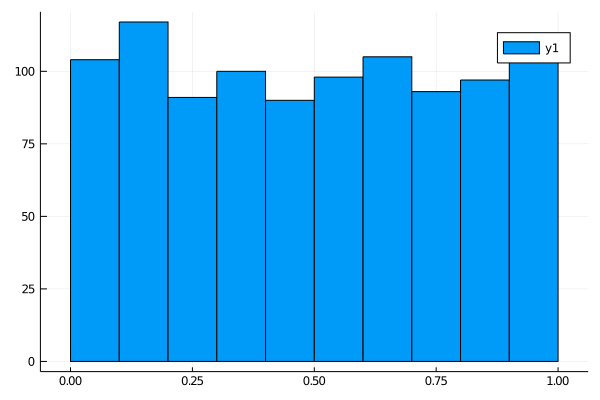

In [156]:
using Plots

histogram(rand(1000))

下面範例是加入 range 定義，產生 10 個 1 到 100 之間的隨機數字。

In [157]:
# rand([rng=GLOBAL_RNG], [S], [dims...])
rand(1:100, 10)

10-element Array{Int64,1}:
 38
 51
 95
 45
 37
 12
 77
 88
 68
 52

產生隨機常態分布數字。

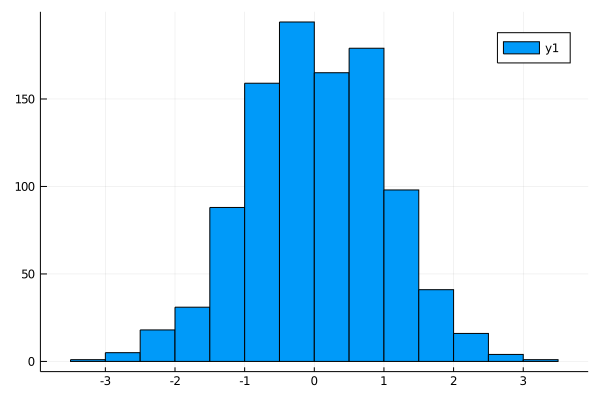

In [160]:
histogram(randn(1000))

產生隨機指數分布數字。randexp() 預設的數值型別也是 Float64。

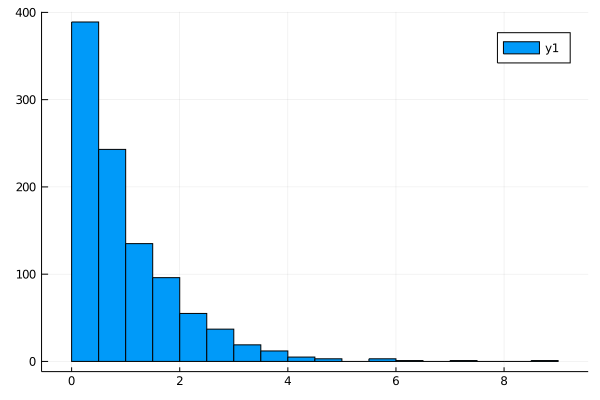

In [162]:
using Random
histogram(randexp(1000))

**給定rng**

In [163]:
# rand([rng=GLOBAL_RNG], [S], [dims...])
rand(MersenneTwister(0), 1:100, 10)

10-element Array{Int64,1}:
 65
 83
 26
 54
 17
  1
 20
 96
 25
 24

In [164]:
# rand([rng=GLOBAL_RNG], [S], [dims...])
rand(MersenneTwister(0), 1:100, 10)

10-element Array{Int64,1}:
 65
 83
 26
 54
 17
  1
 20
 96
 25
 24

# References:
- Marathon example notebook
- [Integers and Floating-Point Numbers](https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers/)
- [Mathematical Operations and Elementary Functions](https://docs.julialang.org/en/v1/manual/mathematical-operations/#Mathematical-Operations-and-Elementary-Functions-1)
- [Complex and Rational Numbers](https://docs.julialang.org/en/v1/manual/complex-and-rational-numbers/)
- [Conversion and Promotion](https://docs.julialang.org/en/v1/manual/conversion-and-promotion/#conversion-and-promotion-1)
- [Machine epsilon](https://en.wikipedia.org/wiki/Machine_epsilon)
- [Convenient function that shows the type hierarchy](https://github.com/JuliaLang/julia/issues/24741)
- [Special types: Core.Any](https://docs.julialang.org/en/v1/base/base/#Core.Any)
